<a href="https://colab.research.google.com/github/hishaam19/RockID/blob/TrainingModelsAlex/Rock_recognition_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [24]:

img_width=80; img_height=80
batch_size=32
NumOfclasses=134

TRAIN_DIR = "/content/drive/MyDrive/Datasets/train"
VAL_DIR = "/content/drive/MyDrive/Datasets/val"
TEST_DIR= "/content/drive/MyDrive/Datasets/test"

In [26]:
#preprocessing datasets
train_data = ImageDataGenerator( 
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    
                                    vertical_flip=False  )
    
val_data = ImageDataGenerator(rescale=1./255)

train_gen = train_data.flow_from_directory(TRAIN_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))





val_gen = val_data.flow_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width)
                                                            )
test_data=tf.keras.preprocessing.image_dataset_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                label_mode='categorical',
                                                shuffle=True,
                                                image_size=(img_height, img_width)
                                                            )

Found 3082 images belonging to 134 classes.
Found 847 images belonging to 134 classes.
Found 847 files belonging to 134 classes.


In [27]:
#create training model
data_augment=Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.2)
])

model=Sequential()
pretrained_model=tf.keras.applications.vgg16.VGG16(include_top=False,
              weights='imagenet', 
              input_shape=(img_height,img_width,3))
for layer in pretrained_model.layers:
  layer.trainable = False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))  
model.add(Dense(512, activation='relu'))
model.add(Dense(134, activation='softmax'))
model.summary()
model.compile(optimizer=Adam(learning_rate=0.001), 
      loss='categorical_crossentropy', 
      metrics =['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 134)               68742     
                                                                 
Total params: 17,406,406
Trainable params: 2,691,718
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(train_gen,
                                epochs=30,
                                verbose=1,
                                validation_data=val_gen,
                                
                                )

Epoch 1/30
97/97 [==============================] - 31s 317ms/step - loss: 3.2015 - accuracy: 0.2031 - val_loss: 2.9346 - val_accuracy: 0.2456
Epoch 2/30
97/97 [==============================] - 31s 319ms/step - loss: 2.6694 - accuracy: 0.2949 - val_loss: 2.6218 - val_accuracy: 0.3129
Epoch 3/30
97/97 [==============================] - 31s 322ms/step - loss: 2.2747 - accuracy: 0.3806 - val_loss: 2.5813 - val_accuracy: 0.3306
Epoch 4/30
97/97 [==============================] - 31s 321ms/step - loss: 2.0421 - accuracy: 0.4270 - val_loss: 2.4817 - val_accuracy: 0.3518
Epoch 5/30
97/97 [==============================] - 40s 418ms/step - loss: 1.8388 - accuracy: 0.4711 - val_loss: 2.4686 - val_accuracy: 0.3542
Epoch 6/30
97/97 [==============================] - 37s 382ms/step - loss: 1.6462 - accuracy: 0.5357 - val_loss: 2.4537 - val_accuracy: 0.3908
Epoch 7/30
97/97 [==============================] - 36s 377ms/step - loss: 1.4807 - accuracy: 0.5860 - val_loss: 2.3875 - val_accuracy: 0.3872

Evaluate test data
27/27 [==============================] - 6s 155ms/step - loss: 306.7475 - accuracy: 0.1086


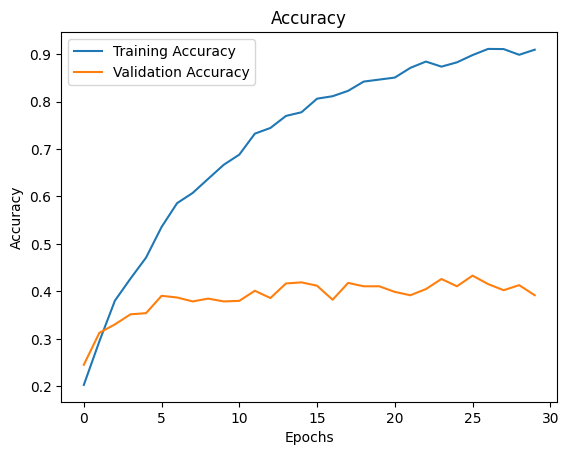

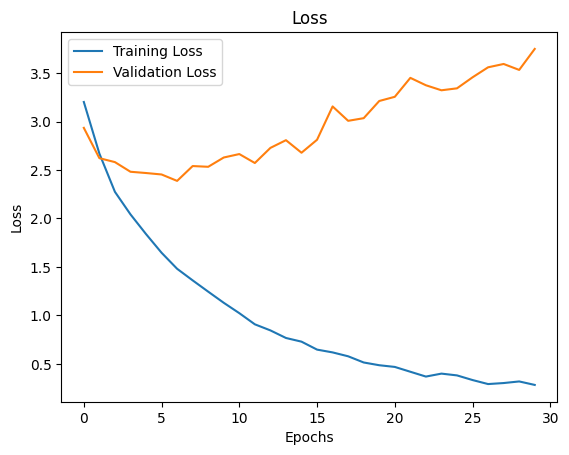

In [32]:
print("Evaluate test data")
#test model 
model.evaluate(test_data)
model.save("test.h5")
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()